In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00


# Scraping Data from Google Play Claude

In [2]:
"""
from google_play_scraper import Sort, reviews

claude_review = 'com.anthropic.claude'

def get_rev(app_id, lang= 'id', count = 20000, sort = Sort.NEWEST, filter_score_with=None, filter_device_with = None, continuation_token = None):
  try:
    result, continuation_token = reviews(
        claude_review,
        lang = lang,
        count = count,
        sort = sort,
        filter_score_with=filter_score_with,
        filter_device_with = filter_device_with,
        continuation_token=continuation_token
    )
    return result, continuation_token
  except Exception as e:
    print(f'Error: {e}')
    return None, None

reviews, continuation_token = get_rev(claude_review)

if reviews is not None:
  print(f'The number of reviews is: {len(reviews)}')
  if len(reviews)>0:
    print('The first review: ', reviews[0])
else:
  print('no reviews found')

"""


"\nfrom google_play_scraper import Sort, reviews\n\nclaude_review = 'com.anthropic.claude'\n\ndef get_rev(app_id, lang= 'id', count = 20000, sort = Sort.NEWEST, filter_score_with=None, filter_device_with = None, continuation_token = None):\n  try:\n    result, continuation_token = reviews(\n        claude_review,\n        lang = lang,\n        count = count,\n        sort = sort,\n        filter_score_with=filter_score_with,\n        filter_device_with = filter_device_with,\n        continuation_token=continuation_token\n    )\n    return result, continuation_token\n  except Exception as e:\n    print(f'Error: {e}')\n    return None, None\n\nreviews, continuation_token = get_rev(claude_review)\n\nif reviews is not None:\n  print(f'The number of reviews is: {len(reviews)}')\n  if len(reviews)>0:\n    print('The first review: ', reviews[0])\nelse:\n  print('no reviews found')\n\n"

# Save the Data in CSV

In [3]:
"""
import csv

def export_to_csv(reviews, filename = 'Claude Review Data.csv'):
  if reviews:
    filenames= ['review_id', 'username', 'rating', 'review text', 'date']

    with open(filename, 'w', newline = '', encoding = 'utf-8') as file:
      writer = csv.DictWriter(file, fieldnames = filenames)
      writer.writeheader()

      for review in reviews:
        writer.writerow({
            'review_id':review['reviewId'],
            'username':review['userName'],
            'rating':review['score'],
            'review text':review['content'],
            'date':review['at'].strftime('%Y-%m-%d')
        })

      print(f'The data export process has finished and the filename is {filename}')
  else:
    print('No Reviews Found')

export_to_csv(reviews)
"""

"\nimport csv\n\ndef export_to_csv(reviews, filename = 'Claude Review Data.csv'):\n  if reviews:\n    filenames= ['review_id', 'username', 'rating', 'review text', 'date']\n\n    with open(filename, 'w', newline = '', encoding = 'utf-8') as file:\n      writer = csv.DictWriter(file, fieldnames = filenames)\n      writer.writeheader()\n\n      for review in reviews:\n        writer.writerow({\n            'review_id':review['reviewId'],\n            'username':review['userName'],\n            'rating':review['score'],\n            'review text':review['content'],\n            'date':review['at'].strftime('%Y-%m-%d')\n        })\n\n      print(f'The data export process has finished and the filename is {filename}')\n  else:\n    print('No Reviews Found')\n\nexport_to_csv(reviews)\n"

In [4]:
import pandas as pd
from google.colab import files, drive

drive.mount('/content/drive')
location = "/content/drive/MyDrive/Machine learning folder/ai sentiment analysis/Claude Review Data.csv"

# download the file
#files.download(location)

# read the file

df = pd.read_csv(location)
df.head()

Mounted at /content/drive


,review_id,username,rating,review text,date
0,c2d1873c-de28-411b-ac4c-3846502e1891,Magnus Carlsenn1,1,cepat kali limitnya tiap ngirim 1 pesan harus ...,2025-11-25
1,91b44f05-cbab-4203-a0c5-0f8dd76f34fb,Fxaa,5,good,2025-11-25
2,79cba8e2-5e98-4d1b-a54f-55618875c0d6,Baim Baim,1,"sayang banget , udah rame rame dan capek capek...",2025-11-25
3,633c62d9-8cd6-41b5-af22-fc987bc93bb8,Astuti Dumai,5,sungguh luar biasa,2025-11-25
4,793f0a74-61fc-4729-b1e0-0293898d6e0b,Atya Burahima,5,Bagus,2025-11-25


# Create Sentiment Category Column

In [5]:
# filters the rating into three categories
def filter_rating(rating):
  if rating > 3:
    return 'Positive'
  elif rating < 3:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df['rating'].apply(filter_rating)
df.head()

,review_id,username,rating,review text,date,sentiment
0,c2d1873c-de28-411b-ac4c-3846502e1891,Magnus Carlsenn1,1,cepat kali limitnya tiap ngirim 1 pesan harus ...,2025-11-25,Negative
1,91b44f05-cbab-4203-a0c5-0f8dd76f34fb,Fxaa,5,good,2025-11-25,Positive
2,79cba8e2-5e98-4d1b-a54f-55618875c0d6,Baim Baim,1,"sayang banget , udah rame rame dan capek capek...",2025-11-25,Negative
3,633c62d9-8cd6-41b5-af22-fc987bc93bb8,Astuti Dumai,5,sungguh luar biasa,2025-11-25,Positive
4,793f0a74-61fc-4729-b1e0-0293898d6e0b,Atya Burahima,5,Bagus,2025-11-25,Positive


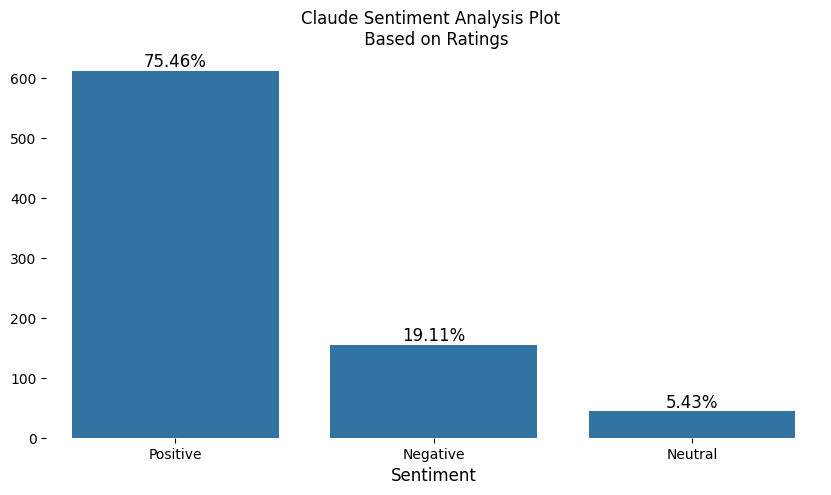

In [6]:
import seaborn as sns
import matplotlib.pylab as plt

sentiment_count = df['sentiment'].value_counts()

fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = sentiment_count.index, y = sentiment_count.values)
plt.title('Claude Sentiment Analysis Plot \n Based on Ratings')
plt.xlabel('Sentiment', fontsize = 12)

total = len(df.sentiment)

for i, count in enumerate(sentiment_count.values):
  percentage = f'{100 * count/total:.2f}%'
  ax.text(i, count + 0.10, f'{percentage}', ha = 'center', va = 'bottom', fontsize = 12)

# Remove the frame
for spine in ax.spines.values():
    spine.set_visible(False)

#plt.savefig('claude_sentiment_ratings.png', dpi = 200)
#files.download('claude_sentiment_ratings.png')
plt.show()

In [7]:
#descriptitve analysis
df['text_length'] = df['review text'].apply(len)
df['word_count'] = df['review text'].str.split().str.len()

print('Text Characteristic')
text_stats = df[['text_length', 'word_count']].describe()
print(text_stats)

Text Characteristic
       text_length  word_count
count   811.000000  811.000000
mean     58.088779    9.410604
std      77.927931   12.699580
min       1.000000    1.000000
25%      11.000000    2.000000
50%      28.000000    5.000000
75%      73.000000   12.000000
max     498.000000   91.000000


# Preprocessing

## Cleaning the Text

In [8]:
import re
import pandas as pd
def basic_clean_text(text):
  if pd.isna(text):
    return ""

  # convert to string if not already
  text = str(text)

  # remove extra space
  text = text.lower()
  text = re.sub(r'\s+', ' ', text).strip()
  return text

def adv_clean_text(text):
  if pd.isna(text):
    return ""

  text = str(text)

  # lower the word
  text = text.lower()

  # remove punctuation and special characters
  text = re.sub(r'[^\w\s]', ' ', text)

  # remove numbers
  text = re.sub(r'\d+', ' ', text)

  # clean extra space
  text = re.sub(r'\s+', ' ', text).strip()

  # reduce repeated characters (e.g., 'gooddd' -> 'good')
  text = re.sub(r'(\w)\1{2,}', r'\1', text)

  return text

# basic clean
df['clean_basic'] = df['review text'].apply(basic_clean_text)
df['clean_basic'].head().tolist()

['cepat kali limitnya tiap ngirim 1 pesan harus nunggu 5 jam lagi biar bisa kirim 1 pesan lainya',
 'good',
 'sayang banget , udah rame rame dan capek capek bikin cerita epic tetapi cuman 4 chapter doang abis itu kena batasan...untuk penggunaan gratisan kayaknya cuman bisa ngirim beberapa pesan doang deh... dilonggarkan dong batasan pengguna gratisannya , nunggu 5 jam untuk beberapa pesan doang...bukan cuman itu tetapi pesannya juga dibatasin secara permanent jadi kalian gabisa ngobrol lama lama nanti di sesi itu juga bakal terbatas dan harus pindah ke sesi baru ( riset obrolan ).',
 'sungguh luar biasa',
 'bagus']

In [9]:
# advance clean
df['clean_adv'] = df['review text'].apply(adv_clean_text)
df['clean_adv'].head().tolist()

['cepat kali limitnya tiap ngirim pesan harus nunggu jam lagi biar bisa kirim pesan lainya',
 'good',
 'sayang banget udah rame rame dan capek capek bikin cerita epic tetapi cuman chapter doang abis itu kena batasan untuk penggunaan gratisan kayaknya cuman bisa ngirim beberapa pesan doang deh dilonggarkan dong batasan pengguna gratisannya nunggu jam untuk beberapa pesan doang bukan cuman itu tetapi pesannya juga dibatasin secara permanent jadi kalian gabisa ngobrol lama lama nanti di sesi itu juga bakal terbatas dan harus pindah ke sesi baru riset obrolan',
 'sungguh luar biasa',
 'bagus']

In [10]:
# analyze the length of the
print(f"\nAverage raw text length: {df['review text'].str.len().mean():.1f} chars")
print(f"\nAverage basic clean text length: {df['clean_basic'].str.len().mean():.1f} chars")
print(f"\nAverage advance clean text length: {df['clean_adv'].str.len().mean():.1f} chars")


Average raw text length: 58.1 chars

Average basic clean text length: 58.1 chars

Average advance clean text length: 56.5 chars


## Delete Stopwords

### Step1: Indonesia Stopwords

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt', quiet = True)
nltk.download('punkt_tab', quiet = True)
stop_words_id = set(stopwords.words('indonesian'))
stop_words_en = set(stopwords.words('english'))

# add custom stopwords
id_stopword = {'dan', 'yang', 'atau', 'apk', 'aplikasinya', 'aplikasi', 'nya', 'juga', 'tau', 'atau', 'ai', 'foto',
               'AI', 'analisa', 'gambar', 'claude', 'banget', 'bgt', 'ya'}
stop_words_id.update(id_stopword)

def remove_stopword_id(text):
  tokens = word_tokenize(text)
  filter_tokens_id = [word for word in tokens if word.lower() not in stop_words_id]
  filtered_text = ' '.join(filter_tokens_id)
  return filtered_text

df['text_no_stopword_id'] = df['clean_adv'].apply(remove_stopword_id)
print('STOPWORD REMOVAL')
print(df['text_no_stopword_id'].head().tolist())
print(f"The length after stopword removal process: {df['text_no_stopword_id'].str.len().mean():.1f} chars")
print(f"The difference: {df['clean_adv'].str.len().mean() - df['text_no_stopword_id'].str.len().mean():.1f} chars")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


STOPWORD REMOVAL
['cepat kali limitnya ngirim pesan nunggu jam biar kirim pesan lainya', 'good', 'sayang udah rame rame capek capek bikin cerita epic cuman chapter doang abis kena batasan penggunaan gratisan kayaknya cuman ngirim pesan doang deh dilonggarkan batasan pengguna gratisannya nunggu jam pesan doang cuman pesannya dibatasin permanent gabisa ngobrol sesi terbatas pindah sesi riset obrolan', 'sungguh', 'bagus']
The length after stopword removal process: 35.1 chars
The difference: 21.3 chars


### Step2: English Stopwords

In [12]:
def remove_stopword_en(text):
  tokens = word_tokenize(text)
  filter_tokens_en = [word for word in tokens if word.lower() not in stop_words_en]
  filtered_text = ' '.join(filter_tokens_en)
  return filtered_text

df['text_no_stopword_en'] = df['text_no_stopword_id'].apply(remove_stopword_en)
print('ENGLISH STOPWORD REMOVAL')
print(df['text_no_stopword_en'].head().tolist())
print(f"The length after stopword removal process:{df['text_no_stopword_en'].str.len().mean():.1f} chars")
print(f"The difference: {df['clean_adv'].str.len().mean() - df['text_no_stopword_en'].str.len().mean():.1f} chars")
print(f"Stopword_id - Stopword_en: {df['text_no_stopword_id'].str.len().mean() - df['text_no_stopword_en'].str.len().mean():.1f} chars")

ENGLISH STOPWORD REMOVAL
['cepat kali limitnya ngirim pesan nunggu jam biar kirim pesan lainya', 'good', 'sayang udah rame rame capek capek bikin cerita epic cuman chapter doang abis kena batasan penggunaan gratisan kayaknya cuman ngirim pesan doang deh dilonggarkan batasan pengguna gratisannya nunggu jam pesan doang cuman pesannya dibatasin permanent gabisa ngobrol sesi terbatas pindah sesi riset obrolan', 'sungguh', 'bagus']
The length after stopword removal process:32.2 chars
The difference: 24.3 chars
Stopword_id - Stopword_en: 3.0 chars


## Tokenization

In [13]:
def tokenize_text(text):
  if pd.isna(text) or text == '':
    return []

  # tokenize using NLTK
  tokens = word_tokenize(text.lower())

  # filter out single character and empty string
  token = [token for token in tokens if len(token)>1]
  return token

df['token_text'] = df['text_no_stopword_en'].apply(tokenize_text)

for i in range (3):
  print(f"Review {i+1}")
  print(df['token_text'].iloc[i])

df['length_token'] = df['token_text'].apply(len)
print(f"\nAverage Tokens per review: {df['length_token'].mean()}")

Review 1
['cepat', 'kali', 'limitnya', 'ngirim', 'pesan', 'nunggu', 'jam', 'biar', 'kirim', 'pesan', 'lainya']
Review 2
['good']
Review 3
['sayang', 'udah', 'rame', 'rame', 'capek', 'capek', 'bikin', 'cerita', 'epic', 'cuman', 'chapter', 'doang', 'abis', 'kena', 'batasan', 'penggunaan', 'gratisan', 'kayaknya', 'cuman', 'ngirim', 'pesan', 'doang', 'deh', 'dilonggarkan', 'batasan', 'pengguna', 'gratisannya', 'nunggu', 'jam', 'pesan', 'doang', 'cuman', 'pesannya', 'dibatasin', 'permanent', 'gabisa', 'ngobrol', 'sesi', 'terbatas', 'pindah', 'sesi', 'riset', 'obrolan']

Average Tokens per review: 4.801479654747226


In [14]:
df.columns

Index(['review_id', 'username', 'rating', 'review text', 'date', 'sentiment',
       'text_length', 'word_count', 'clean_basic', 'clean_adv',
       'text_no_stopword_id', 'text_no_stopword_en', 'token_text',
       'length_token'],
      dtype='object')

#  Exploratory Data Analysis

## Most Frequent Words

In [15]:
from nltk.probability import FreqDist
all_words = [word for tokens in df['token_text'] for word in tokens]
freq_dist = FreqDist(all_words)

print("MOST COMMON WORD: ")
print(freq_dist.most_common(10))

MOST COMMON WORD: 
[('bagus', 168), ('membantu', 80), ('good', 49), ('mantap', 42), ('keren', 37), ('udah', 33), ('chat', 32), ('gak', 31), ('tolong', 31), ('login', 29)]


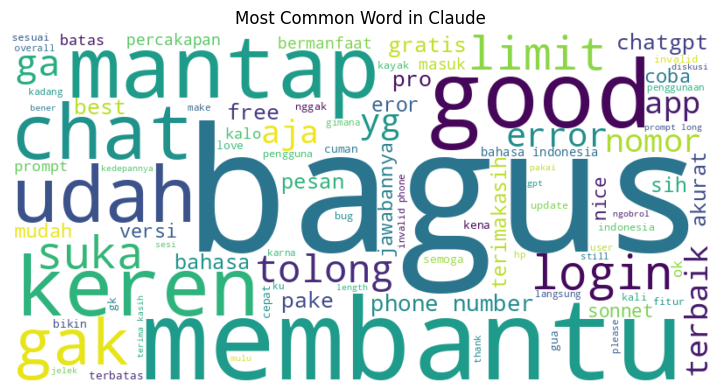

In [16]:
from wordcloud import WordCloud
import matplotlib.pylab as plt

all_words = [word for tokens in df['token_text'] for word in tokens]
freqdist = FreqDist(all_words)

text = ' '.join(all_words)
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', min_font_size = 10).generate(text)

plt.figure(figsize = (7,7), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most Common Word in Claude')
plt.tight_layout(pad = 0)
#plt.savefig('claude_most_freq_words.png', dpi = 200)
#files.download('claude_most_freq_words.png')
plt.show()

## Text Post-Cleaning Statistics

In [17]:
# Text processing statistics
print('Text Processing Statistics:')
print(f'Raw Text = {df['review text'].str.len().mean()} chars')
print(f"Final Text = {df['text_no_stopword_en'].str.len().mean()} chars")
print(f"Reduction: {((df['review text'].str.len().mean() - df['text_no_stopword_en'].str.len().mean())*100/df['review text'].str.len().mean()):.1f}%")

Text Processing Statistics:
Raw Text = 58.08877928483354 chars
Final Text = 32.15413070283601 chars
Reduction: 44.6%


In [18]:
# Word count comparison
df['clean_word_count'] = df['text_no_stopword_en'].str.split().str.len()

print(f"\nRaw avg words: {df['length_token'].mean():.1f} Words")
print(f"Final avg words: {df['clean_word_count'].mean():.1f} Words")


Raw avg words: 4.8 Words
Final avg words: 4.8 Words


In [19]:
# check for the empty text after cleaning process
empty_post_cleaning = df[df['text_no_stopword_en'].str.strip() == ""]
print(f"\nNumber of empty posts after cleaning: {len(empty_post_cleaning)}")

# non empty
if len(empty_post_cleaning) > 0:
  print('Example of empty posts after cleaning')
  print(empty_post_cleaning['review text'].head().tolist())


Number of empty posts after cleaning: 22
Example of empty posts after cleaning
['baik', '🥰🥰', 'luar biasa', 'baik', '❤️\u200d🔥❤️\u200d🔥']


In [20]:
empty_post_cleaning

,review_id,username,rating,review text,date,sentiment,text_length,word_count,clean_basic,clean_adv,text_no_stopword_id,text_no_stopword_en,token_text,length_token,clean_word_count
39,e430254b-72fa-4d55-97e8-03a72bbc0729,Aldi Pranata Nasution,5,baik,2025-11-13,Positive,4,1,baik,baik,,,[],0,0
56,38b4eaf1-2dc4-4d58-ae8a-4ea452c8c2d6,Elexon Siboro,5,🥰🥰,2025-11-04,Positive,2,1,🥰🥰,,,,[],0,0
80,bfb852d5-c268-4126-8650-1b3ea3778b1b,Alam Pramono,5,luar biasa,2025-10-24,Positive,10,2,luar biasa,luar biasa,,,[],0,0
167,9d361835-6b97-4615-b593-34961b2b48e1,Serly Murys,5,baik,2025-09-20,Positive,4,1,baik,baik,,,[],0,0
220,2c782724-da35-4ae8-9afc-123ed470f64f,Ryy Mart,5,❤️‍🔥❤️‍🔥,2025-08-21,Positive,8,1,❤️‍🔥❤️‍🔥,,,,[],0,0
223,05a45494-a965-458c-9006-2c87c5a69cb4,Risky Goar,5,👍,2025-08-17,Positive,1,1,👍,,,,[],0,0
322,45e29262-da3d-4d96-afd1-5eeeb4f40313,ikadek suawidiya dwipayana,5,👍👍👍👍,2025-06-22,Positive,4,1,👍👍👍👍,,,,[],0,0
338,364aea47-ec63-4b62-a855-c260a7cf1017,jatmiko nugroho,5,luar biasa,2025-06-09,Positive,10,2,luar biasa,luar biasa,,,[],0,0
369,d3559b1d-e4da-4219-8c61-7369b3286e8a,Anna Ratela,5,💐,2025-05-20,Positive,1,1,💐,,,,[],0,0
384,db939a24-0f55-400c-a3a2-cc608476352a,Igo Yulianto,5,luar biasa 🌟🌟🌟🌟🌟,2025-05-09,Positive,16,3,luar biasa 🌟🌟🌟🌟🌟,luar biasa,,,[],0,0


In [21]:
# change date dtype from object into datetime
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   review_id            811 non-null    object        
 1   username             811 non-null    object        
 2   rating               811 non-null    int64         
 3   review text          811 non-null    object        
 4   date                 811 non-null    datetime64[ns]
 5   sentiment            811 non-null    object        
 6   text_length          811 non-null    int64         
 7   word_count           811 non-null    int64         
 8   clean_basic          811 non-null    object        
 9   clean_adv            811 non-null    object        
 10  text_no_stopword_id  811 non-null    object        
 11  text_no_stopword_en  811 non-null    object        
 12  token_text           811 non-null    object        
 13  length_token         811 non-null  

## Negative Sentiment Frequency Analysis

In [22]:
neg_rev = df[df['sentiment']=='Negative']
print(f"Total Negative Review: {len(neg_rev)}")

neg_rev.sample(5)

Total Negative Review: 155


,review_id,username,rating,review text,date,sentiment,text_length,word_count,clean_basic,clean_adv,text_no_stopword_id,text_no_stopword_en,token_text,length_token,clean_word_count
206,848435c0-4971-48e6-b1c3-c286051152c6,Sigit Allatif,1,tdk bsa login,2025-08-26,Negative,13,3,tdk bsa login,tdk bsa login,tdk bsa login,tdk bsa login,"[tdk, bsa, login]",3,3
438,9c26178f-83c7-4c7c-ae78-436139118d49,Juan Felix,2,percakapan tidak muncul setelah diklik di riwa...,2025-03-18,Negative,61,8,percakapan tidak muncul setelah diklik di riwa...,percakapan tidak muncul setelah diklik di riwa...,percakapan muncul diklik riwayat percakapan,percakapan muncul diklik riwayat percakapan,"[percakapan, muncul, diklik, riwayat, percakapan]",5,5
599,8e3f25f2-5d9d-4fc3-9e40-8bc3fe2304ff,Nashwan Zakir,1,Ga bisa login invalid number mulu padahal udah...,2024-11-11,Negative,52,9,ga bisa login invalid number mulu padahal udah...,ga bisa login invalid number mulu padahal udah...,ga login invalid number mulu udah,ga login invalid number mulu udah,"[ga, login, invalid, number, mulu, udah]",6,6
784,f9330cbd-1972-4ab4-963d-aaab50dc4195,Qitlee,1,"I want to use your API, my suggestion is to ad...",2024-08-30,Negative,103,21,"i want to use your api, my suggestion is to ad...",i want to use your api my suggestion is to add...,i want to use your api my suggestion is to add...,want use api suggestion add google play paymen...,"[want, use, api, suggestion, add, google, play...",13,13
711,5e05b182-2862-431a-be1c-8c7c331c0f61,Hazrat Muh. Amar Faqih,1,"developer ga becus, masukin nomor yg jelas2 be...",2024-10-05,Negative,63,10,"developer ga becus, masukin nomor yg jelas2 be...",developer ga becus masukin nomor yg jelas bene...,developer ga becus masukin nomor yg bener invalid,developer ga becus masukin nomor yg bener invalid,"[developer, ga, becus, masukin, nomor, yg, ben...",8,8


In [23]:
# Visualize most frequent words in negative sentiment
from wordcloud import WordCloud
import matplotlib.pylab as plt

# Use FreqDist to see Negative Sentiment Distribution
non_pos_sent = df[df['sentiment'] != 'Positive'].copy()

non_pos_words = [word for tokens in non_pos_sent['token_text'] for word in tokens]
fdist = FreqDist(non_pos_words)

print('Most Common Words in Negative Sentiment:')
print(fdist.most_common(10))

Most Common Words in Negative Sentiment:
[('login', 26), ('number', 26), ('nomor', 24), ('gak', 23), ('invalid', 23), ('udah', 22), ('tolong', 19), ('phone', 19), ('chat', 16), ('limit', 14)]


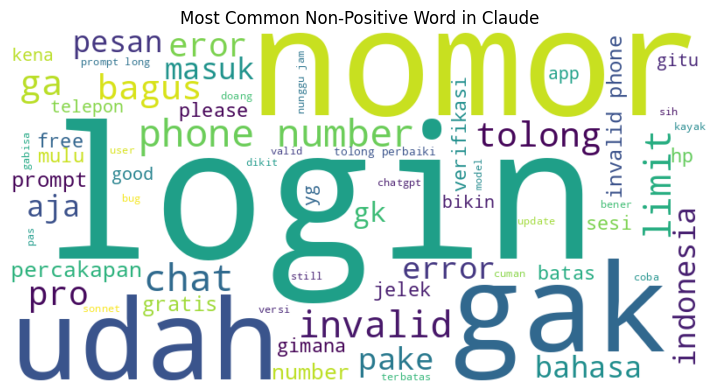

In [24]:
text = ' '.join(non_pos_words)
wordcloud = WordCloud(width = 800, height = 400, background_color='white', min_font_size=12).generate(text)

plt.figure(figsize = (7,7), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Non-Positive Word in Claude')
plt.tight_layout(pad = 0)
#plt.savefig('claude_nonpos_words.png', dpi=200)
#files.download('claude_nonpos_words.png')
plt.show()

In [25]:
# search words 'login' and 'nomor'
search_words = ['login', 'nomor']
relevant_word_mentions = df['token_text'].apply(lambda x: any(word in x for word in search_words))
relevant_word_count = relevant_word_mentions.sum()

print(f"The words {search_words} appear in {relevant_word_count} reviews.")

if relevant_word_count > 0:
    print(f"\nReviews containing {search_words}:")
    for index, row in df[relevant_word_mentions].head().iterrows():
        print(f"- Review: {row['review text']}")
        print(f"  Cleaned tokens: {row['token_text']}")

The words ['login', 'nomor'] appear in 41 reviews.

Reviews containing ['login', 'nomor']:
- Review: lho, kok gak bisa login?
  Cleaned tokens: ['lho', 'gak', 'login']
- Review: bagus, cara menjelaskannya juga bagus, tidak terlalu kaku seperti AI lainnya, overall lebih bagus daripada ai yang pernah aku coba lainnya. Namun ada satu hal yang kurang, yaitu kadang suka gak bisa masuk, alias eror, apakah maintenance, dicoba login ulang tetap eror, dan itu benar² di waktu yang tidak pas😮‍💨😮‍💨
  Cleaned tokens: ['bagus', 'menjelaskannya', 'bagus', 'kaku', 'overall', 'bagus', 'coba', 'kadang', 'suka', 'gak', 'masuk', 'alias', 'eror', 'maintenance', 'dicoba', 'login', 'ulang', 'eror', 'benar²', 'pas']
- Review: kok tiba tiba log out sendiri dan gk bisa login lagi helppp
  Cleaned tokens: ['log', 'gk', 'login', 'help']
- Review: tdk bsa login
  Cleaned tokens: ['tdk', 'bsa', 'login']
- Review: masi ada bug ketika mau login, no telpon tidak valid atau attemt apalah, padahal besoknya di coba lagi 

## Time Based Sentiment Analysis

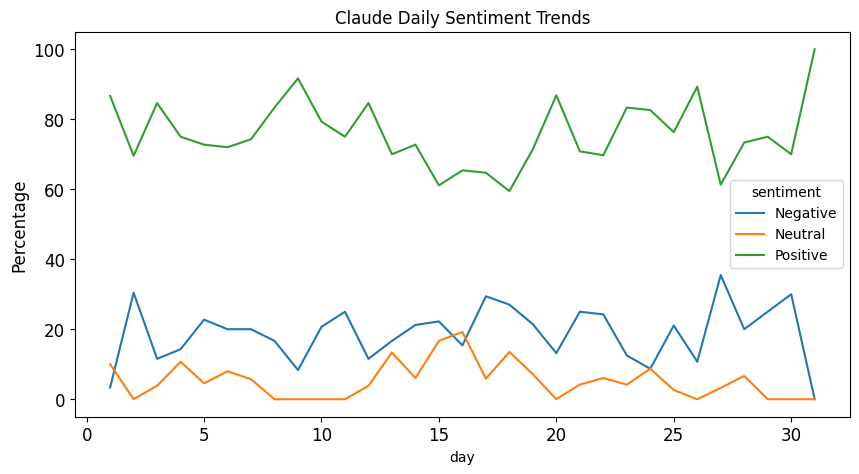

In [26]:
# create daily sentiment trends
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

daily_sentiment = df.groupby(['day', 'sentiment']).size().unstack(fill_value = 0)
percent_dailysentiment = daily_sentiment.div(daily_sentiment.sum(axis = 1), axis = 0)*100

fig, ax = plt.subplots(figsize = (10,5))
percent_dailysentiment.plot(kind = 'line', y = ['Negative', 'Neutral', 'Positive'], title = 'Claude Daily Sentiment Trends', fontsize = 12, ax = ax)
ax.set_ylabel('Percentage', fontsize = 12)
#plt.savefig('claude_daily_sentiment_trends.png', dpi = 200)
#files.download('claude_daily_sentiment_trends.png')
plt.show()

In [27]:
# weekly and weekdays sentiment reviews

df['day_of_weeks'] = df['date'].dt.day_name()
weekly_sentiment = pd.crosstab(index = df['day_of_weeks'], columns = df['sentiment'], normalize = 'index')*100

# re order day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sentiment = weekly_sentiment.reindex(day_order)

print("\nSentiment Day of Week (%): ")
print(weekly_sentiment)


Sentiment Day of Week (%): 
sentiment      Negative   Neutral   Positive
day_of_weeks                                
Monday        20.000000  6.400000  73.600000
Tuesday       20.279720  4.895105  74.825175
Wednesday     15.238095  5.714286  79.047619
Thursday      20.312500  3.906250  75.781250
Friday        22.680412  5.154639  72.164948
Saturday      19.417476  6.796117  73.786408
Sunday        15.454545  5.454545  79.090909


## Word Count Distribution after Cleaning Process

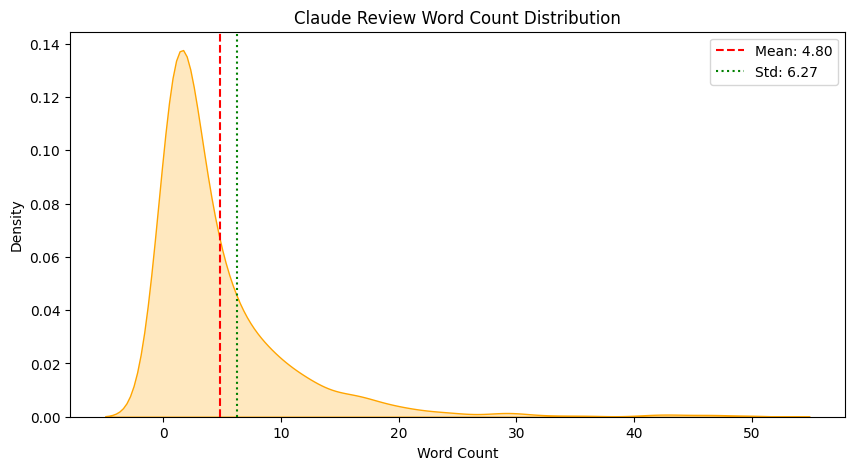

In [28]:
# visualization after preprocessing (text length and word count)
plt.figure(figsize = (10, 5))
sns.kdeplot(data = df, x = df['length_token'], fill = True, color = 'orange')

# mean and standard deviation
mean = df['length_token'].mean()
std = df['length_token'].std()

# plot mean and std
plt.axvline(mean, color = 'r', linestyle = '--', label =f'Mean: {mean:.2f}')
plt.axvline(std, color = 'g', linestyle = ':', label =f'Std: {std:.2f}')
plt.legend()

plt.xlabel('Word Count')
plt.title('Claude Review Word Count Distribution')

# save the figure
#plt.savefig('claude_review_wordcount_dist.png', dpi = 200)
#files.download('claude_review_wordcount_dist.png')

plt.show()

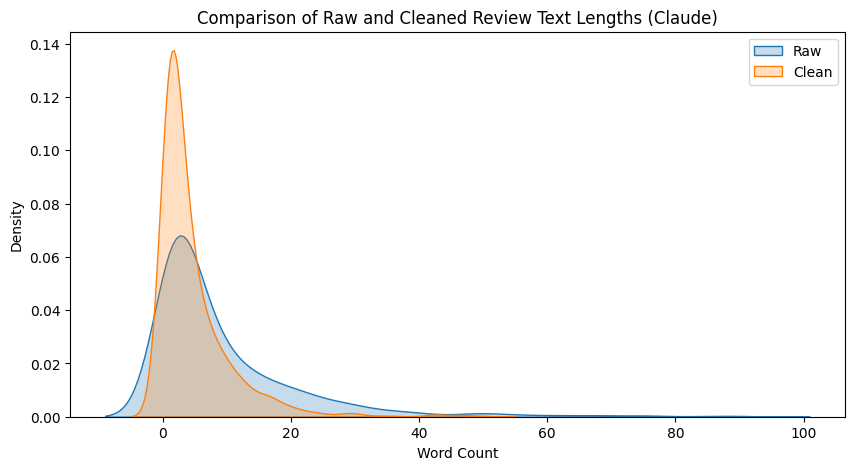

In [29]:
length_review_df = pd.DataFrame({'length_cleaned_reviews':df.length_token, 'length_raw_review':df['review text'].str.split().str.len()})
raw = length_review_df['length_raw_review']
clean = length_review_df['length_cleaned_reviews']

plt.figure(figsize = (10,5))
sns.kdeplot(data = length_review_df, x = raw, fill = True, label = 'Raw')
sns.kdeplot(data = length_review_df, x = clean, fill = True, label = 'Clean')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Comparison of Raw and Cleaned Review Text Lengths (Claude)')
plt.legend()

# save the figure
#plt.savefig('raw_cleaned_comparison_dist_claude.png', dpi = 300)
#files.download('raw_cleaned_comparison_dist_claude.png')

plt.show()

## Long Text Review

In [30]:
# find the review with 20 or more word counts
long_review = df[df['length_token'] >= 20]
long_review.sample(5)

,review_id,username,rating,review text,date,sentiment,text_length,word_count,clean_basic,clean_adv,text_no_stopword_id,text_no_stopword_en,token_text,length_token,clean_word_count,month,year,day,day_of_weeks
795,0d327362-d406-4d3b-8ad5-29e3ff429a8f,Suthara Apriza Wali,1,"Hey, aren't you being a bit too stingy with th...",2024-08-10,Negative,479,88,"hey, aren't you being a bit too stingy with th...",hey aren t you being a bit too stingy with the...,hey aren t you being a bit too stingy with the...,hey bit stingy limits get premium user feels l...,"[hey, bit, stingy, limits, get, premium, user,...",43,43,8,2024,10,Saturday
311,be049e30-8aca-4e9f-8ea6-1fe49ae6f831,Ranindra A.S Dika,3,overall bagus banget dari keakuratan informasi...,2025-06-28,Neutral,310,49,overall bagus banget dari keakuratan informasi...,overall bagus banget dari keakuratan informasi...,overall bagus keakuratan informasi suka bikin ...,overall bagus keakuratan informasi suka bikin ...,"[overall, bagus, keakuratan, informasi, suka, ...",24,24,6,2025,28,Saturday
32,c405acb1-64d9-4c64-abed-0ee446e56c01,Echa Puspita,3,"kadang oke, kadang bisa ngaco, bisa ngarang ja...",2025-11-16,Neutral,194,32,"kadang oke, kadang bisa ngaco, bisa ngarang ja...",kadang oke kadang bisa ngaco bisa ngarang jawa...,kadang oke kadang ngaco ngarang kalo ga jd tet...,kadang oke kadang ngaco ngarang kalo ga jd tet...,"[kadang, oke, kadang, ngaco, ngarang, kalo, ga...",22,22,11,2025,16,Sunday
192,d201e179-d356-4f35-84c2-7998c01a46cf,Apria Darmawan.,5,bintang 5 deh tapi ini perbaiki lagi dong kak ...,2025-09-07,Positive,256,44,bintang 5 deh tapi ini perbaiki lagi dong kak ...,bintang deh tapi ini perbaiki lagi dong kak so...,bintang deh perbaiki kak nggak bahasa indonesi...,bintang deh perbaiki kak nggak bahasa indonesi...,"[bintang, deh, perbaiki, kak, nggak, bahasa, i...",21,21,9,2025,7,Sunday
234,7c44af83-ed7b-489d-95fc-dd05f3c20c0f,Yoga Surya Nugroho,1,This is just cash grab applications. Even you ...,2025-08-12,Negative,473,84,this is just cash grab applications. even you ...,this is just cash grab applications even you i...,this is just cash grab applications even you i...,cash grab applications even pro plan still get...,"[cash, grab, applications, even, pro, plan, st...",50,50,8,2025,12,Tuesday


# Sentiment Analysis Method

## Lexicon Based Approach

In [31]:
sentiment_lexicon_id = {'bagus': 1, 'baik': 1, 'keren': 1, 'mantap': 1, 'membantu': 1, 'canggih':1, 'terbaik':1,
    'jelek': -1, 'buruk': -1, 'lama': -1, 'error': -1, 'susah': -1, 'eror':-1, 'bug':-1, 'gabisa':-1, 'aneh':-1, 'berbayar':-1, 'bayar':-1, 'memburuk':-1, 'menurun':-1,
    'biasa': 0, 'netral': 0}

sentiment_lexicon_en = {'good': 1, 'bad': -1, 'neutral': 0}

combined_lexicon = {**sentiment_lexicon_id, **sentiment_lexicon_en}

def lexicon_based(text):
  if pd.isna(text) or text.strip() == '':
    return 0

  tokens = text.split()
  score = 0
  for token in tokens:
    if token in combined_lexicon:
      score += combined_lexicon[token]
  return score

# apply the lexicon based sentiment analysis to the cleaned text
df['lexicon_score'] = df['clean_adv'].apply(lexicon_based)

# categorize lexicon sentiment score
def cat_lexicon_sentiment(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['lexicon_sentiment_category'] = df['lexicon_score'].apply(cat_lexicon_sentiment)

df[['review text', 'sentiment', 'token_text', 'lexicon_score', 'lexicon_sentiment_category']].sample(5)

,review text,sentiment,token_text,lexicon_score,lexicon_sentiment_category
430,"Bagus sekali, jawabannya menurutku sangat semp...",Positive,"[bagus, jawabannya, menurutku, sempurna, akura...",2,Positive
628,the best,Positive,[best],0,Neutral
371,SO MANY DISPLAY ERROR I WANT CLAUDE TO WRITE N...,Negative,"[many, display, error, want, write, novel, lik...",-1,Negative
281,AI TERBAIK KEDUA SETELAH CHATGPT KEREN,Positive,"[terbaik, chatgpt, keren]",2,Positive
180,ai yang dimiliki oleh Claudia sangat luar bias...,Positive,"[dimiliki, claudia, versi, gratis, kinerjanya,...",0,Neutral


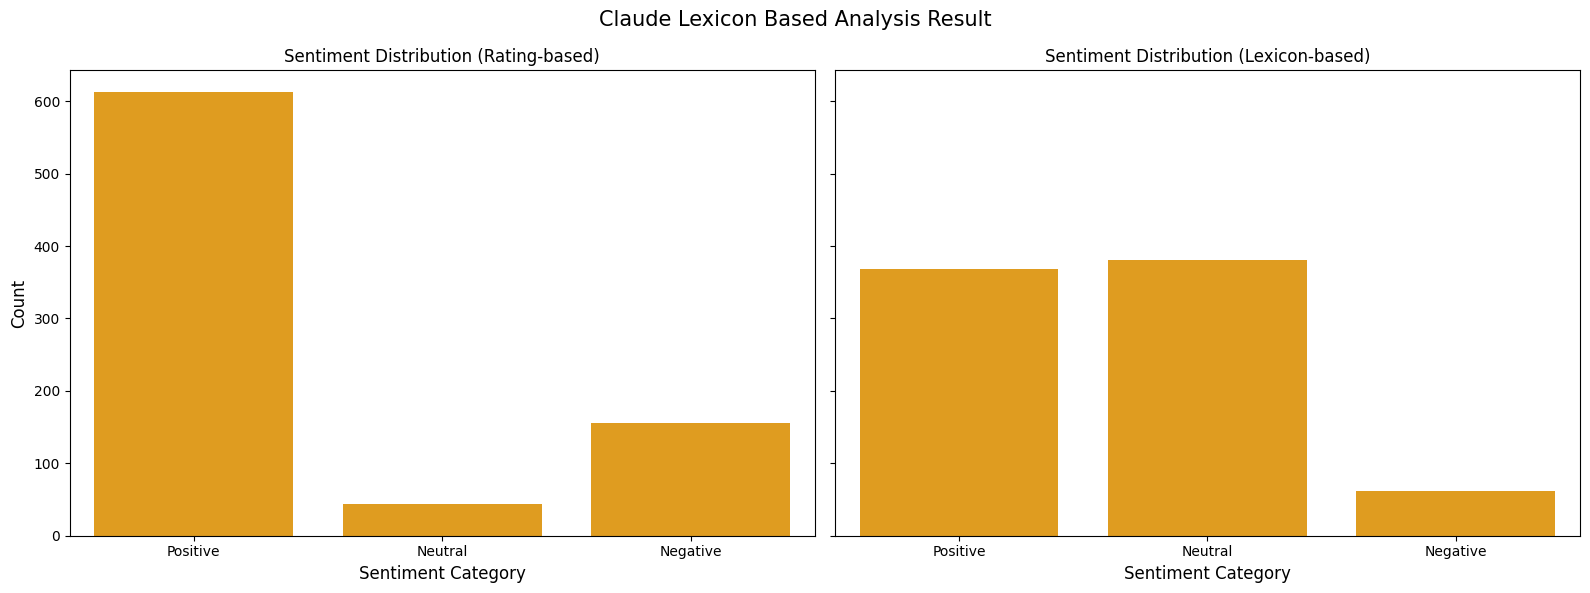

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey = True)

sentiment_order = ['Positive', 'Neutral', 'Negative']

# Countplot for 'sentiment' (based on ratings)
sns.countplot(data=df, x='sentiment', order=sentiment_order, legend=False, ax=axes[0], color = 'orange')
axes[0].set_title('Sentiment Distribution (Rating-based)',fontsize = 12)
axes[0].set_xlabel('Sentiment Category',fontsize = 12)
axes[0].set_ylabel('Count', fontsize = 12)

# Countplot for 'lexicon_sentiment_category'
sns.countplot(data=df, x='lexicon_sentiment_category', order=sentiment_order, legend=False, ax=axes[1], color = 'orange')
axes[1].set_title('Sentiment Distribution (Lexicon-based)', fontsize = 12)
axes[1].set_xlabel('Sentiment Category', fontsize = 12)
axes[1].set_ylabel('Count', fontsize = 12)

plt.suptitle('Claude Lexicon Based Analysis Result', fontsize = 15)
plt.tight_layout()
#plt.savefig('claude_lexicon_result.png', dpi = 300)
#files.download('claude_lexicon_result.png')
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
lexicon_acc = accuracy_score(df['sentiment'], df['lexicon_sentiment_category'])
print(f"Lexicon Based Accuracy: {lexicon_acc*100:.2f}%")

Lexicon Based Accuracy: 51.42%


## TF IDF Method

TF IDF (Term Frequency-Inverse Document Frequency) is the statistical measure to evaluate how important a word is to document in a collection or corpus. The equation is TF is

$$TF(t, d) = \frac{Number\space of\space times\space term\space t\space appears\space in\space document\space d\space}{Total\space number\space of\space terms\space in\space document\space d\space}$$

and for IDF

$$IDF(t) = log(\frac{Total\space number\space of\space documents}{Number\space of\space documents\space with\space term\space t\space in\space it\space})$$

Then, the final equation is

$$TFIDF = TF(t,d)*IDF(t)$$

In [35]:
# TF IDF Calculation

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
matrix = tfidf_vectorizer.fit_transform(df['clean_adv'])

tfidf_df = pd.DataFrame(matrix.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,aamiin,abis,access,accessible,ada,adalah,add,added,adding,address,...,yah,yaitu,yak,yakin,yang,yg,you,your,zero,ありがとう
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.106965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# brief demo about TF IDF filterization
# select the term
selected_term = ['login', 'nomor', 'limit']

tfidf_sort = tfidf_df.sort_values(by = selected_term, ascending = False)

top_indices = tfidf_sort.head(10).index

# display those rows
df.loc[top_indices, ['review text', 'sentiment', 'token_text']].sample(10)

,review text,sentiment,token_text
688,Tidak bisa login [phone number invalid] aplika...,Negative,"[login, phone, number, invalid, rusak]"
25,"lho, kok gak bisa login?",Neutral,"[lho, gak, login]"
709,Gak bisa login,Negative,"[gak, login]"
648,Tidak bisa Login,Negative,[login]
536,Gabisa login,Negative,"[gabisa, login]"
621,Gak bisa login,Negative,"[gak, login]"
729,Gak bisa login nomor salah trus,Negative,"[gak, login, nomor, salah, trus]"
739,Kenapa sekarang tidak bisa login?,Negative,[login]
206,tdk bsa login,Negative,"[tdk, bsa, login]"
550,Untuk login sangat susah tolong di perbaiki,Negative,"[login, susah, tolong, perbaiki]"


## Long Short Term Memory (LSTM)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
df_copy = df[['username', 'rating', 'date', 'sentiment', 'text_length', 'word_count', 'clean_adv']].copy()

texts = df_copy['clean_adv'].astype(str).values
labels = df_copy['sentiment'].map({'Positive':1, 'Negative':0, 'Neutral':0}).values

# tokenize and pad
vocab_size = 130
maxlen = 80
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen = maxlen)

padded[4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size = 0.2, random_state = 42)

for i in range(5):
  print(f"Review {i+1}")
  print(f"Raw Review: {texts[i][:150]}")
  print(f"Tokenize Sequence (first 10 tokens): {sequences[i][:10]}")
  print(f"Padded Sequence (first 10 values): {padded[i][:10]}")
  sentiment = 'Positive' if labels[i] == 1 else 'Negative'
  print(f"Label (Encoded): {labels[i]} ({sentiment})")
  print("-"*90)

Review 1
Raw Review: cepat kali limitnya tiap ngirim pesan harus nunggu jam lagi biar bisa kirim pesan lainya
Tokenize Sequence (first 10 tokens): [88, 41, 21, 6, 88]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 0 (Negative)
------------------------------------------------------------------------------------------
Review 2
Raw Review: good
Tokenize Sequence (first 10 tokens): [20]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 1 (Positive)
------------------------------------------------------------------------------------------
Review 3
Raw Review: sayang banget udah rame rame dan capek capek bikin cerita epic tetapi cuman chapter doang abis itu kena batasan untuk penggunaan gratisan kayaknya cum
Tokenize Sequence (first 10 tokens): [11, 30, 3, 47, 15, 6, 104, 88, 15, 104]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 0 (Negative)
------------------------------------------------------------------------

In [40]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(LSTM(64, dropout = 0.01, recurrent_dropout = 0.1, kernel_regularizer = l2(0.001)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_split=0.2)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.6414 - loss: 0.7227 - val_accuracy: 0.8154 - val_loss: 0.5691
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7399 - loss: 0.5949 - val_accuracy: 0.8154 - val_loss: 0.5051
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7404 - loss: 0.5570 - val_accuracy: 0.8154 - val_loss: 0.5036
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.7707 - loss: 0.5137 - val_accuracy: 0.8231 - val_loss: 0.4802
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7314 - loss: 0.5442 - val_accuracy: 0.8231 - val_loss: 0.4768
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7894 - loss: 0.5040 - val_accuracy: 0.8000 - val_loss: 0.4630
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.8016 - loss: 0.4762 - val_accuracy: 0.8000 - val_loss: 0.4648
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8624 - loss: 0.4439 - val_accuracy: 0.7923 - val_loss: 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

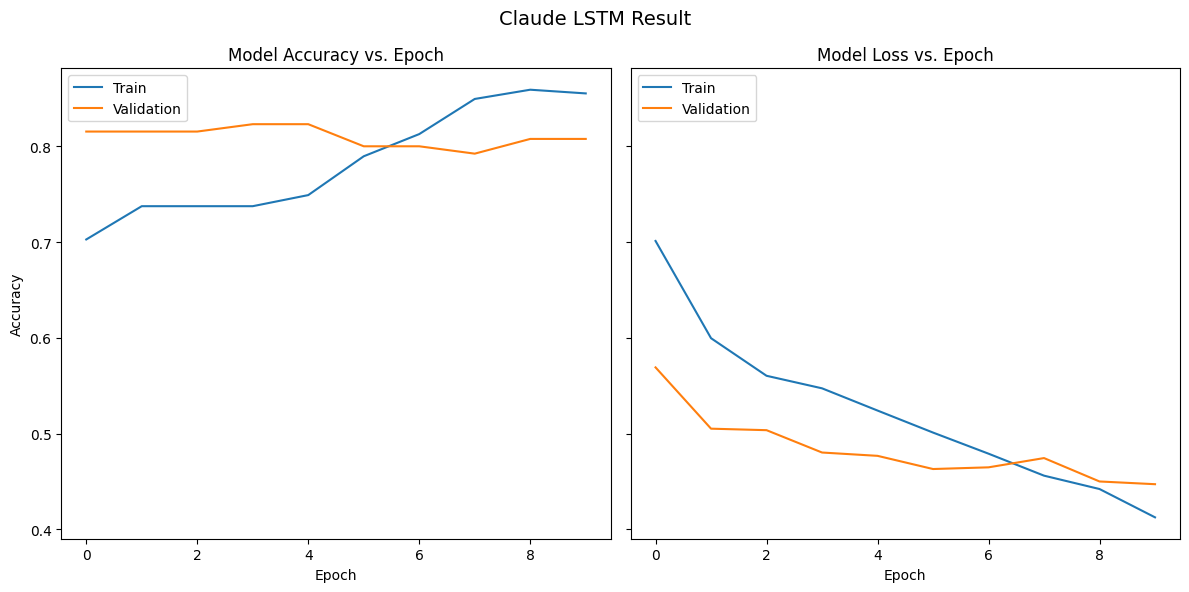

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot accuracy
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot loss
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss vs. Epoch')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')

fig.suptitle('Claude LSTM Result', fontsize = 14) # Adjusted suptitle position
plt.savefig('claude_lstm_result.png', dpi = 300)
#files.download('claude_lstm_result.png')
#plt.tight_layout()
plt.show()

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy of the model: {accuracy * 100:.2f}")
print(f"Loss of the model: {loss*100:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7648 - loss: 0.4629
Accuracy of the model: 76.69
Loss of the model: 47.04


In [44]:
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


Model Evaluation
Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.44      0.47        39
           1       0.83      0.87      0.85       124

    accuracy                           0.77       163
   macro avg       0.67      0.65      0.66       163
weighted avg       0.76      0.77      0.76       163



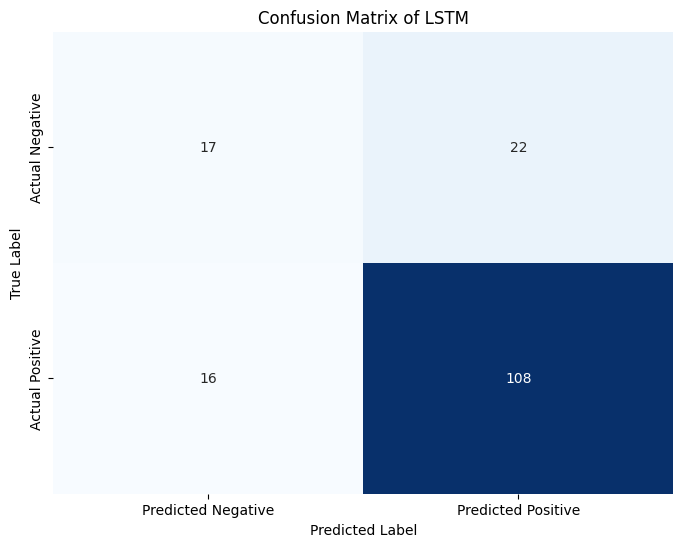

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
binary_predictions = (predictions >= 0.5).astype(int)

print('Model Evaluation')
print(f'Accuracy: {accuracy_score(y_test, binary_predictions):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, binary_predictions))

# confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of LSTM')
plt.show()

In [46]:
def predict_sentiment(text):
  seq = tokenizer.texts_to_sequences([text])
  padded_seq = pad_sequences(seq, maxlen = maxlen)
  pred = model.predict(padded_seq)[0][0]
  return 'Positive' if pred >= 0.5 else 'Negative'

In [47]:
while True:
  user_input = input("Enter a review (type 'exit' to quit): ")
  if user_input.lower() == 'exit':
    break
  print(f"predicted sentiment: {predict_sentiment(user_input)}")

Enter a review (type 'exit' to quit): exit


## Bi LSTM

In [48]:
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dense

model_bi = Sequential()
model_bi.add(Embedding(vocab_size, 32))
model_bi.add(Bidirectional(LSTM(64, dropout = 0.01, recurrent_dropout=0.1, kernel_regularizer = l2(0.001))))
model_bi.add(Dense(1, activation = 'sigmoid'))

model_bi.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_bi.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
history_bi = model_bi.fit(X_train, y_train, epochs = 20, batch_size =64, validation_split=0.2)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 387ms/step - accuracy: 0.7288 - loss: 0.7605 - val_accuracy: 0.8154 - val_loss: 0.5674
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.7553 - loss: 0.6472 - val_accuracy: 0.8154 - val_loss: 0.5609
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.7491 - loss: 0.6139 - val_accuracy: 0.8154 - val_loss: 0.5543
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.7154 - loss: 0.6154 - val_accuracy: 0.8154 - val_loss: 0.5063
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7408 - loss: 0.5846 - val_accuracy: 0.8154 - val_loss: 0.4983
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.7559 - loss: 0.5268 - val_accuracy: 0.8308 - val_loss: 0.4877
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.7812 - loss: 0.5210 - val_accuracy: 0.8077 - val_loss: 0.4768
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8357 - loss: 0.4767 - val_accuracy: 0.8077 - val_loss

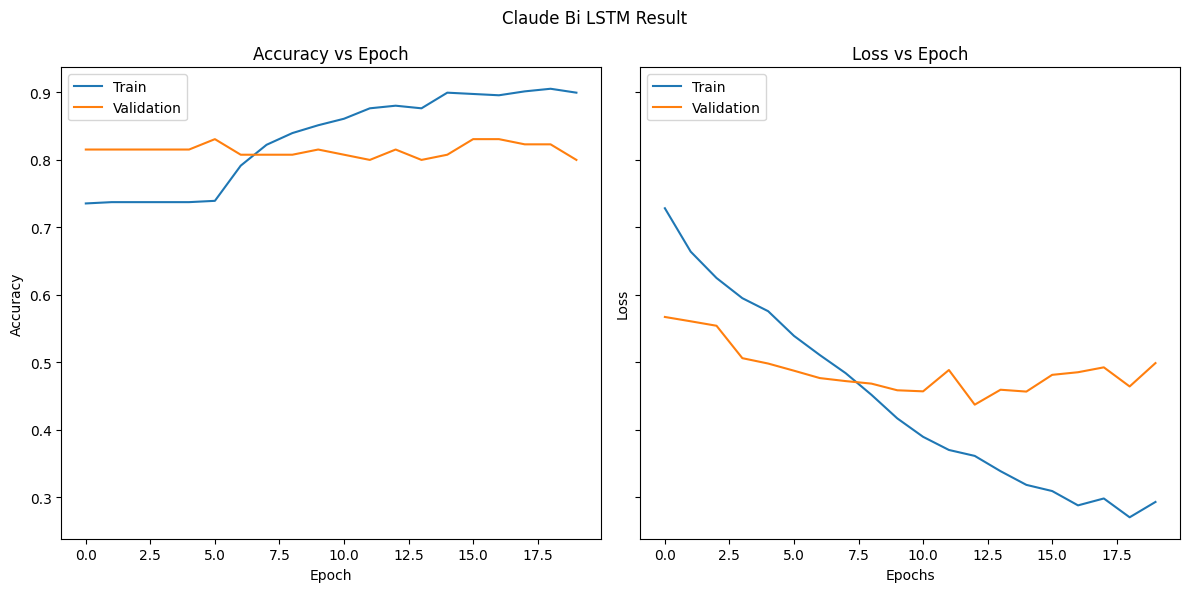

In [50]:
# accuracy
fig, axs = plt.subplots(1,2, figsize = (12,6), sharey = True)
axs[0].plot(history_bi.history['accuracy'])
axs[0].plot(history_bi.history['val_accuracy'])
axs[0].set_title('Accuracy vs Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Validation'], loc = 'upper left')

# loss
axs[1].plot(history_bi.history['loss'])
axs[1].plot(history_bi.history['val_loss'])
axs[1].set_title('Loss vs Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Validation'], loc = 'upper left')

plt.suptitle("Claude Bi LSTM Result")
plt.tight_layout()
#plt.savefig('claude_bi_lstm_result.png', dpi = 300)
#files.download('claude_bi_lstm_result.png')
plt.show()

In [51]:
loss, accuracy = model_bi.evaluate(X_test, y_test)
print(f"Accuracy: {100*accuracy:.2f}")
print(f"Loss: {100*loss:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8153 - loss: 0.4640
Accuracy: 80.37
Loss: 47.94


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step
Model Evaluation
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        39
           1       0.88      0.86      0.87       124

    accuracy                           0.80       163
   macro avg       0.73      0.74      0.73       163
weighted avg       0.81      0.80      0.81       163



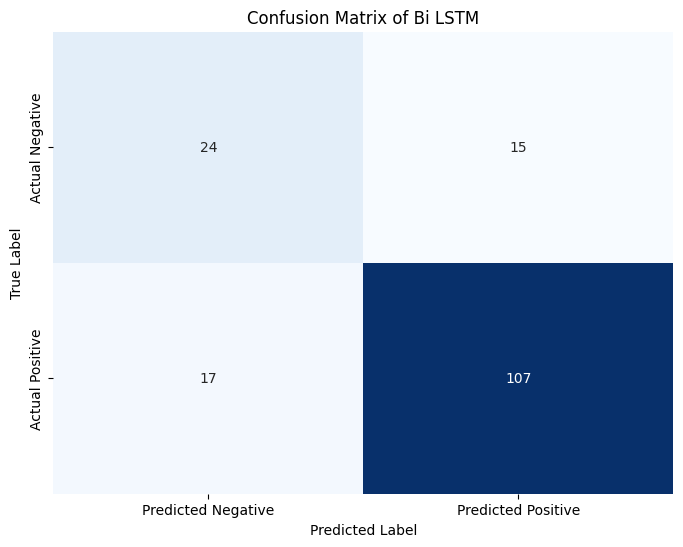

In [52]:
# convert probabilities into binary prediction (0 and 1)
binary_prediction = (model_bi.predict(X_test)>=0.5).astype(int)

print('Model Evaluation')
print(f"Accuracy: {accuracy_score(y_test, binary_prediction):.2f}")
print('\nClassification Report:')
print(classification_report(y_test, binary_prediction))

# confusion matrix
cm = confusion_matrix(y_test, binary_prediction)

plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',cbar = False, \
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Bi LSTM')
plt.show()

## Save LSTM and Bi LSTM

In [54]:
import os

save_dir = '/content/drive/MyDrive/Machine learning folder/ai sentiment analysis'
os.makedirs(save_dir, exist_ok=True)

bi_lstm_model_path = os.path.join(save_dir, 'bi_lstm_claude.keras')
lstm_model_path = os.path.join(save_dir, 'lstm_claude.keras')

model_bi.save(bi_lstm_model_path)
print(f"Bi-LSTM model saved to: {bi_lstm_model_path}")


model.save(lstm_model_path)
print(f"LSTM model saved to: {lstm_model_path}")

Bi-LSTM model saved to: /content/drive/MyDrive/Machine learning folder/ai sentiment analysis/bi_lstm_claude.keras
LSTM model saved to: /content/drive/MyDrive/Machine learning folder/ai sentiment analysis/lstm_claude.keras


## Machine Learning Model

In [55]:
## support vector classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

if 'tfidf_vectorizer' not in locals():
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(df_copy['clean_adv'])

x_text = df_copy['clean_adv']
y = df_copy['sentiment'].map({'Positive':1, 'Negative':0, 'Neutral':0}).values # Correctly map sentiment strings to numbers

X_train_text, X_test_text, y_train, y_test = train_test_split(x_text, y, test_size = 0.2, random_state = 42)

# Transform text data into numerical TF-IDF features
X_train = tfidf_vectorizer.transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68        39
           1       0.89      0.93      0.91       124

    accuracy                           0.86       163
   macro avg       0.81      0.78      0.80       163
weighted avg       0.85      0.86      0.86       163

